# **Projet Python** 

---


##### NASSAR Ibrahim - HAOUAS Lies -TRANG Thomas




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import numpy as np
import json
import folium
import urllib.request 
import seaborn as sns


# Mode Opératoire

Chaque section (indicateur) peut être executer indépendament des autres indicateurs. Cependant, il est nécessaire d'executer la section "Préparation du dataframe 2019" avant toutes les autres. Pour les indcateurs de comparaison sur différentes années, il est nécessaire d'executer la section "Chargement et préparation des nouveaux dataframe".

# Préparation du dataframe

In [ ]:
df = pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20200416-115822/valeursfoncieres-2019.txt',sep='|',dtype='str')


In [ ]:
df = df.fillna('NULLCOL')

In [ ]:
col2delete = []

In [ ]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        if df[col].unique()[0] == 'NULLCOL':
            col2delete.append(col)


In [ ]:
df = df.drop(columns=col2delete)
df

No disposition Date mutation  ... Nature culture speciale Surface terrain
0               000001    04/01/2019  ...                 NULLCOL         NULLCOL
1               000001    04/01/2019  ...                 NULLCOL         NULLCOL
2               000001    04/01/2019  ...                 NULLCOL         NULLCOL
3               000001    08/01/2019  ...                 NULLCOL             940
4               000001    07/01/2019  ...                 NULLCOL             490
...                ...           ...  ...                     ...             ...
2535786         000001    05/12/2019  ...                 NULLCOL             470
2535787         000001    05/12/2019  ...                 NULLCOL             470
2535788         000001    10/10/2019  ...                 NULLCOL         NULLCOL
2535789         000001    30/12/2019  ...                 NULLCOL         NULLCOL
2535790         000001    30/12/2019  ...                 NULLCOL         NULLCOL

[2535791 rows x 35 columns]

On importe ici tous les codes régions pour pouvoir créer une nouvelle colonne et grouper les mutations

In [ ]:
REGIONS = {
    'Auvergne-Rhône-Alpes': ['01', '03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Bretagne': ['35', '22', '56', '29'],
    'Centre-Val de Loire': ['18', '28', '36', '37', '41', '45'],
    'Corse': ['2A', '2B'],
    'Grand Est': ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Guadeloupe': ['971'],
    'Guyane': ['973'],
    'Hauts-de-France': ['02', '59', '60', '62', '80'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'La Réunion': ['974'],
    'Martinique': ['972'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Nouvelle-Aquitaine': ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    'Occitanie': ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Pays de la Loire': ['44', '49', '53', '72', '85'],
    'Provence-Alpes-Côte d\'Azur': ['04', '05', '06', '13', '83', '84'] }

In [ ]:
def get_region(code_region):
    for key in REGIONS.keys():
        if code_region in REGIONS[key]:
            return key

In [ ]:
df['Region'] = df['Code departement'].apply(get_region)
df

No disposition Date mutation  ... Surface terrain                Region
0               000001    04/01/2019  ...         NULLCOL  Auvergne-Rhône-Alpes
1               000001    04/01/2019  ...         NULLCOL  Auvergne-Rhône-Alpes
2               000001    04/01/2019  ...         NULLCOL  Auvergne-Rhône-Alpes
3               000001    08/01/2019  ...             940  Auvergne-Rhône-Alpes
4               000001    07/01/2019  ...             490  Auvergne-Rhône-Alpes
...                ...           ...  ...             ...                   ...
2535786         000001    05/12/2019  ...             470         Île-de-France
2535787         000001    05/12/2019  ...             470         Île-de-France
2535788         000001    10/10/2019  ...         NULLCOL         Île-de-France
2535789         000001    30/12/2019  ...         NULLCOL         Île-de-France
2535790         000001    30/12/2019  ...         NULLCOL         Île-de-France

[2535791 rows x 36 columns]

Création d'un identifiant pour chaque mutation foncière

In [ ]:
df['num_mutation'] = df['Date mutation'] + df['Nature mutation']  + df['Valeur fonciere']+ df['Voie'] + df['No voie'] + df['Code postal'] + df['Region']

Formatter la valeur

In [ ]:
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
df

No disposition  ...                                       num_mutation
0               000001  ...  04/01/2019Vente37220,00DE MONTHOLON261000Auver...
1               000001  ...  04/01/2019Vente185100,00GEN DELESTRAINT221000A...
2               000001  ...  04/01/2019Vente185100,00GEN DELESTRAINT221000A...
3               000001  ...  08/01/2019Vente209000,00DES CHAMPAGNES31160Auv...
4               000001  ...  07/01/2019Vente134900,00LE BIOLAY51370Auvergne...
...                ...  ...                                                ...
2535786         000001  ...  05/12/2019Vente17521000,00DE BETHUNE3275004Île...
2535787         000001  ...  05/12/2019Vente17521000,00DE BETHUNE3275004Île...
2535788         000001  ...  10/10/2019Adjudication610000,00BEAUTREILLIS127...
2535789         000001  ...  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...
2535790         000001  ...  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...

[2535791 rows x 37 columns]

In [ ]:
def conv_float(col):
    if col == 'NULLCOL':
        return 0
    else :
        return float(col)

In [ ]:
df['Valeur fonciere'] = df['Valeur fonciere'].apply(conv_float)

In [ ]:
df['Valeur fonciere'] = df['Valeur fonciere'].astype(float)

In [ ]:
DEPARTMENTS = {
    '01': 'Ain', 
    '02': 'Aisne', 
    '03': 'Allier', 
    '04': 'Alpes-de-Haute-Provence', 
    '05': 'Hautes-Alpes',
    '06': 'Alpes-Maritimes', 
    '07': 'Ardèche', 
    '08': 'Ardennes', 
    '09': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}

In [ ]:
def get_departement(code_departement):
    return DEPARTMENTS.get(code_departement)

In [ ]:
df['Departement'] = df['Code departement'].apply(get_departement)
df

No disposition  ... Departement
0               000001  ...         Ain
1               000001  ...         Ain
2               000001  ...         Ain
3               000001  ...         Ain
4               000001  ...         Ain
...                ...  ...         ...
2535786         000001  ...       Paris
2535787         000001  ...       Paris
2535788         000001  ...       Paris
2535789         000001  ...       Paris
2535790         000001  ...       Paris

[2535791 rows x 38 columns]

# Indicateur 1 : Region avec le plus de vente

In [ ]:
df_indicateur1=df[['Date mutation','Nature mutation','Valeur fonciere','No voie','Voie','Code postal','Region']]
len(df_indicateur1)

2535791

In [ ]:
df_indicateur1=df_indicateur1.drop_duplicates()
len(df_indicateur1)

1443854

In [ ]:
df_indicateur1=df_indicateur1.groupby('Region')['Nature mutation'].value_counts().sort_values(ascending=False)
df_indicateur1


Region                Nature mutation      
Île-de-France         Vente                    218291
Nouvelle-Aquitaine    Vente                    179093
Pays de la Loire      Vente                    138472
Occitanie             Vente                    122054
Auvergne-Rhône-Alpes  Vente                    120548
                                                ...  
Guadeloupe            Adjudication                  3
                      Vente terrain à bâtir         3
Corse                 Vente terrain à bâtir         2
Martinique            Echange                       2
Bretagne              Expropriation                 1
Name: Nature mutation, Length: 90, dtype: int64

In [ ]:
df_indic_1 = df[['Date mutation','Nature mutation','Valeur fonciere','No voie','Voie','Code postal','Region']]

In [ ]:
df_indic_1 = df_indic_1.drop_duplicates()

In [ ]:
df_indic_1 = df_indic_1.groupby('Region')['Nature mutation'].value_counts().sort_values(ascending=False)
df_indic_1

Region                Nature mutation      
Île-de-France         Vente                    218291
Nouvelle-Aquitaine    Vente                    179093
Pays de la Loire      Vente                    138472
Occitanie             Vente                    122054
Auvergne-Rhône-Alpes  Vente                    120548
                                                ...  
Guadeloupe            Adjudication                  3
                      Vente terrain à bâtir         3
Corse                 Vente terrain à bâtir         2
Martinique            Echange                       2
Bretagne              Expropriation                 1
Name: Nature mutation, Length: 90, dtype: int64

In [ ]:
fig = pd.DataFrame(df_indic_1).style.background_gradient(cmap='Reds')\
                                .set_properties(**{'text-align':'center'})

In [ ]:
fig

# Indicateur 2 : Nombre de Maison par région

In [ ]:
df_indic_2 = df[['Type local','Region']]

In [ ]:
df_indic_2 = df_indic_2.loc[df_indic_2['Type local'] == 'Maison']

In [ ]:
res = pd.DataFrame(df_indic_2.groupby('Region')['Type local'].value_counts().sort_values(ascending=True))

In [ ]:
res['Region'] = [res.index[i][0] for i in range(len(res))]

In [ ]:
fig = px.bar(res,x="Type local", y="Region" ,title='Repartition des maisons par régions', 
             text='Type local', orientation='h',range_x = [0, max(res['Type local'])+10000])
fig.update_traces(marker_color= '#ba2710', opacity=1, textposition='outside')
fig.show()

# Indicateur 3 : Prix moyen du mètre carré par région

In [ ]:
df_indic_3_tmp = df[['Valeur fonciere' , 'num_mutation', 'Surface reelle bati','Region' ]]

In [ ]:
df_indic_3_tmp = df_indic_3_tmp.loc[df_indic_3_tmp['Surface reelle bati'] != 'NULLCOL']

In [ ]:
df_indic_3_tmp['Surface reelle bati'] = df_indic_3_tmp['Surface reelle bati'].astype(float)

In [ ]:
df_indic_3 = pd.DataFrame(df_indic_3_tmp.groupby('num_mutation')['Surface reelle bati'].sum())

In [ ]:
df_indic_3 = df_indic_3.reset_index()

In [ ]:
df_indic_3 = pd.merge(df_indic_3,df_indic_3_tmp,on='num_mutation',how='left')


In [ ]:
df_indic_3 = df_indic_3.drop_duplicates('num_mutation')\
                        .drop(columns=['Surface reelle bati_y','num_mutation'])

In [ ]:
df_indic_3 = df_indic_3.loc[(df_indic_3['Surface reelle bati_x'] != np.float64(0)) & (df_indic_3['Valeur fonciere'] != np.float64(0))]

In [ ]:
df_indic_3['prix_m2'] = df_indic_3['Valeur fonciere'] / df_indic_3['Surface reelle bati_x']
df_indic_3

Surface reelle bati_x  ...       prix_m2
0                         88.0  ...  16824.522727
2                         88.0  ...  16824.522727
3                         88.0  ...  16824.522727
4                         72.0  ...  20563.305556
5                         88.0  ...  16824.522727
...                        ...  ...           ...
1351603                   42.0  ...   2314.285714
1351604                  111.0  ...    878.378378
1351606                  240.0  ...    408.333333
1351609                   69.0  ...   1434.782609
1351610                  180.0  ...   5504.644444

[777300 rows x 4 columns]

In [ ]:
res = pd.DataFrame(df_indic_3.groupby('Region')['prix_m2'].mean())
res

prix_m2
Region                                 
Auvergne-Rhône-Alpes        2411.891954
Bourgogne-Franche-Comté     1249.155527
Bretagne                    3318.622459
Centre-Val de Loire         1723.346098
Corse                       3410.632935
Grand Est                   1383.903823
Guadeloupe                  2492.862409
Guyane                      2406.236109
Hauts-de-France             1899.008849
La Réunion                  2281.990545
Martinique                  2271.158896
Normandie                   2073.345123
Nouvelle-Aquitaine          2286.678766
Occitanie                   4145.804468
Pays de la Loire            2341.411151
Provence-Alpes-Côte d'Azur  3471.766928
Île-de-France               5503.211589

In [ ]:
res = res.reset_index()
res

index                      Region      prix_m2
0       0        Auvergne-Rhône-Alpes  2411.891954
1       1     Bourgogne-Franche-Comté  1249.155527
2       2                    Bretagne  3318.622459
3       3         Centre-Val de Loire  1723.346098
4       4                       Corse  3410.632935
5       5                   Grand Est  1383.903823
6       6                  Guadeloupe  2492.862409
7       7                      Guyane  2406.236109
8       8             Hauts-de-France  1899.008849
9       9                  La Réunion  2281.990545
10     10                  Martinique  2271.158896
11     11                   Normandie  2073.345123
12     12          Nouvelle-Aquitaine  2286.678766
13     13                   Occitanie  4145.804468
14     14            Pays de la Loire  2341.411151
15     15  Provence-Alpes-Côte d'Azur  3471.766928
16     16               Île-de-France  5503.211589

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

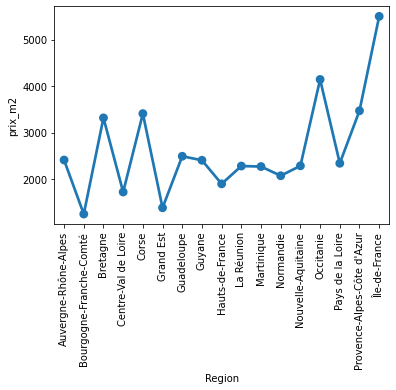

In [ ]:
sns.pointplot(x='Region',y='prix_m2',data=res)
matplotlib.pyplot.xticks(rotation = 90)

# Indicateur 4 : Classement des surfaces moyenne des logements par département

In [ ]:
df_indic_4 = df[['Date mutation','Nature mutation','Surface reelle bati','Code postal','Code departement','Departement']]

In [ ]:
df_indic_4['Surface reelle bati'] = df_indic_4['Surface reelle bati'].apply(conv_float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_indic_4 = df_indic_4.loc[df_indic_4['Surface reelle bati'] != 'NULLCOL']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
df_indic_4 = df_indic_4.drop_duplicates()

**Classement des 10 plus grandes surfaces par département en France**

In [ ]:
france_classement = df_indic_4.groupby('Departement')['Surface reelle bati'].mean().sort_values(ascending=False)
france_classement

Departement
Ardèche           115.412586
Maine-et-Loire    103.722115
Vendée            100.805707
Eure               97.186528
Oise               97.080727
                     ...    
Hautes-Alpes       54.670696
La Réunion         54.540868
Corse-du-Sud       53.048387
Savoie             50.506568
Haute-Corse        32.857143
Name: Surface reelle bati, Length: 97, dtype: float64

In [ ]:
fig_France_head = pd.DataFrame(france_classement.head(10)).style.background_gradient(cmap='Reds')\
                                .set_properties(**{'text-align':'center'})
fig_France_tail = pd.DataFrame(france_classement.tail(10)).style.background_gradient(cmap='Blues')\
                                .set_properties(**{'text-align':'center'})

In [ ]:
fig_France_head

**Classement des 10 plus petites surfaces par département en France**

In [ ]:
fig_France_tail

**Carte des surfaces moyennes des logements par départment en France**

In [ ]:
url = urllib.request.urlopen("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
urlReunion = urllib.request.urlopen("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements/974-la-reunion/departement-974-la-reunion.geojson")
geoFrance = json.loads(url.read().decode())
geoFrance['features'].append(json.loads(urlReunion.read().decode()))


In [ ]:
departementsDf = pd.DataFrame({
    "Departement" : [arr['properties']['nom'] for arr in geoFrance['features']], 
    "Surface réelle bâti" : france_classement
})
departementsDf

Departement  Surface réelle bâti
Departement                                               
Ardèche                         Aisne           115.412586
Maine-et-Loire                   Aube           103.722115
Vendée                       Calvados           100.805707
Eure                           Cantal            97.186528
Oise                     Eure-et-Loir            97.080727
...                               ...                  ...
Hautes-Alpes                  Mayenne            54.670696
La Réunion         Meurthe-et-Moselle            54.540868
Corse-du-Sud              Deux-Sèvres            53.048387
Savoie          Territoire de Belfort            50.506568
Haute-Corse                La Réunion            32.857143

[97 rows x 2 columns]

In [ ]:
france = folium.Map(location = [46.603354, 1.8883335], zoom_start = 6)
france.choropleth(geoFrance, key_on = "feature.properties.nom",
                 data = departementsDf, columns = ["Departement", "Surface réelle bâti"],
                 fill_color = "Spectral")
france

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



**Classement des surfaces par arrondisssement à Pairs**

In [ ]:
paris_classement =  df_indic_4[(df_indic_4['Code departement'] == '75')].groupby('Code postal')['Surface reelle bati'].mean()

In [ ]:
paris_classement = paris_classement.drop(index='NULLCOL')

In [ ]:
fig_Paris= pd.DataFrame(paris_classement).style.background_gradient(cmap='Reds')\
                                .set_properties(**{'text-align':'center'})

In [ ]:
fig_Paris

**Carte des surfaces moyennes des logements par arrondissements à Paris**

In [ ]:
urlParis = urllib.request.urlopen("https://raw.githubusercontent.com/Liies/ParisJson/master/arrondissements.geojson")
geoParis = json.loads(urlParis.read().decode())
urlParis
#geoParis = json.load(open("donnees/arrondissements.geojson"))

In [ ]:
arrondissementDf = pd.DataFrame({
    "Arrondissement" : [arr["properties"]["c_ar"] for arr in geoParis["features"]], 
    "Surface réelle bâti" : paris_classement
})
arrondissementDf

Arrondissement  Surface réelle bâti
Code postal                                     
75001                     7            87.011412
75002                    11            82.842202
75003                    13            58.634008
75004                     4            50.930041
75005                     8            48.780142
75006                    18            66.003191
75007                    15            71.289759
75008                     3           108.847963
75009                     5            82.422695
75010                     6            60.924869
75011                    12            45.970068
75012                     9            56.521359
75013                    19            66.225088
75014                     2            50.592641
75015                    17            59.201766
75016                    14            89.266185
75017                    20            71.789420
75018                     1            46.235711
75019                    10            63.428683
75020                    16            45.336553

In [ ]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
paris.choropleth(geoParis, key_on = "feature.properties.c_ar",
                 data = arrondissementDf, columns = ["Arrondissement", "Surface réelle bâti"],
                 fill_color = "Spectral")
paris

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# Indicateur 5 : Nombre de mutation par Trimestre

In [ ]:
df_indic_5 = df[['num_mutation','Date mutation','Type local']]
df_indic_5

num_mutation  ...                                Type local
0        04/01/2019Vente37220,00DE MONTHOLON261000Auver...  ...                               Appartement
1        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...                               Appartement
2        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...                                Dépendance
3        08/01/2019Vente209000,00DES CHAMPAGNES31160Auv...  ...                                    Maison
4        07/01/2019Vente134900,00LE BIOLAY51370Auvergne...  ...                                    Maison
...                                                    ...  ...                                       ...
2535786  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                               Appartement
2535787  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                                Dépendance
2535788  10/10/2019Adjudication610000,00BEAUTREILLIS127...  ...                               Appartement
2535789  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...  Local industriel. commercial ou assimilé
2535790  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...                               Appartement

[2535791 rows x 3 columns]

In [ ]:
df_indic_5 = df_indic_5.loc[df_indic_5['Type local'] != 'NULLCOL']
df_indic_5

num_mutation  ...                                Type local
0        04/01/2019Vente37220,00DE MONTHOLON261000Auver...  ...                               Appartement
1        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...                               Appartement
2        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...                                Dépendance
3        08/01/2019Vente209000,00DES CHAMPAGNES31160Auv...  ...                                    Maison
4        07/01/2019Vente134900,00LE BIOLAY51370Auvergne...  ...                                    Maison
...                                                    ...  ...                                       ...
2535786  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                               Appartement
2535787  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                                Dépendance
2535788  10/10/2019Adjudication610000,00BEAUTREILLIS127...  ...                               Appartement
2535789  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...  Local industriel. commercial ou assimilé
2535790  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...                               Appartement

[1353332 rows x 3 columns]

In [ ]:
df_indic_5 = df_indic_5.drop_duplicates()

In [ ]:

df_indic_5['Date mutation'] = pd.to_datetime(df_indic_5['Date mutation'],format='%d/%m/%Y')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def affect_trimestre(col):
    if col.month <= 4 :
        return 'Premier Trimestre'
    elif col.month > 4 and col.month <= 8:
        return 'Deuxieme Trimestre'
    else : 
        return 'Troisième Trimestre'

In [ ]:



df_indic_5['Trimestre'] = df_indic_5['Date mutation'].apply(affect_trimestre)
df_indic_5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



num_mutation  ...            Trimestre
0        04/01/2019Vente37220,00DE MONTHOLON261000Auver...  ...    Premier Trimestre
1        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...    Premier Trimestre
2        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...    Premier Trimestre
3        08/01/2019Vente209000,00DES CHAMPAGNES31160Auv...  ...    Premier Trimestre
4        07/01/2019Vente134900,00LE BIOLAY51370Auvergne...  ...    Premier Trimestre
...                                                    ...  ...                  ...
2535768  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...  Troisième Trimestre
2535774  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...  Troisième Trimestre
2535788  10/10/2019Adjudication610000,00BEAUTREILLIS127...  ...  Troisième Trimestre
2535789  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...  Troisième Trimestre
2535790  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...  Troisième Trimestre

[1028316 rows x 4 columns]

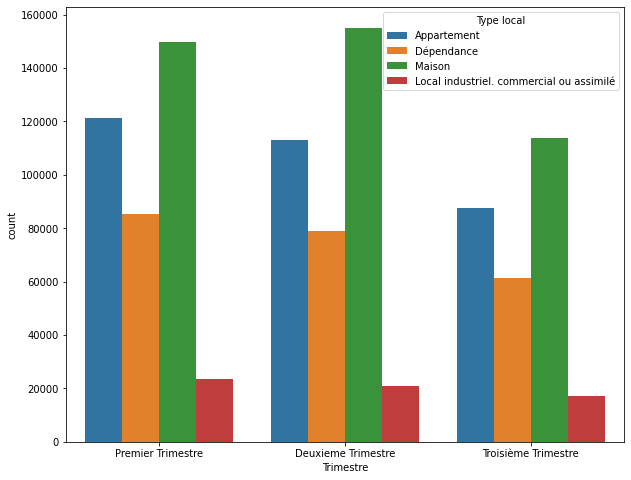

In [ ]:
import seaborn as sns
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
test = sns.countplot(x="Trimestre", hue="Type local", data=df_indic_5)

Indicateur 6 : Différence surface réelle / terrain

In [ ]:
df_indic_6_tmp = df[['num_mutation','Surface reelle bati','Surface terrain','Code departement']]
df_indic_6_tmp

num_mutation  ... Code departement
0        04/01/2019Vente37220,00DE MONTHOLON261000Auver...  ...               01
1        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...               01
2        04/01/2019Vente185100,00GEN DELESTRAINT221000A...  ...               01
3        08/01/2019Vente209000,00DES CHAMPAGNES31160Auv...  ...               01
4        07/01/2019Vente134900,00LE BIOLAY51370Auvergne...  ...               01
...                                                    ...  ...              ...
2535786  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...               75
2535787  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...               75
2535788  10/10/2019Adjudication610000,00BEAUTREILLIS127...  ...               75
2535789  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...               75
2535790  30/12/2019Vente1400000,00SAINT SAUVEUR2475002Î...  ...               75

[2535791 rows x 4 columns]

In [ ]:

df_indic_6_tmp = df_indic_6_tmp[(df_indic_6_tmp['Surface reelle bati'] != 'NULLCOL') & (df_indic_6_tmp['Surface terrain'] != 'NULLCOL')]
df_indic_6_tmp

num_mutation  ... Code departement
3        08/01/2019Vente209000,00DES CHAMPAGNES31160Auv...  ...               01
4        07/01/2019Vente134900,00LE BIOLAY51370Auvergne...  ...               01
5        03/01/2019Vente192000,00DES LIBELLULES1651340A...  ...               01
6        08/01/2019Vente45000,00DU VIADUC91250Auvergne-...  ...               01
13       07/01/2019Vente116000,00DE MONTLEGER17241560Au...  ...               01
...                                                    ...  ...              ...
2535783  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...               75
2535784  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...               75
2535785  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...               75
2535786  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...               75
2535787  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...               75

[728072 rows x 4 columns]

In [ ]:
df_indic_6_tmp['Surface reelle bati'] = df_indic_6_tmp['Surface reelle bati'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_indic_6_tmp['Surface terrain'] = df_indic_6_tmp['Surface terrain'].astype(float)
df_indic_6_tmp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



num_mutation  ...  Code departement
3        08/01/2019Vente209000,00DES CHAMPAGNES31160Auv...  ...                01
4        07/01/2019Vente134900,00LE BIOLAY51370Auvergne...  ...                01
5        03/01/2019Vente192000,00DES LIBELLULES1651340A...  ...                01
6        08/01/2019Vente45000,00DU VIADUC91250Auvergne-...  ...                01
13       07/01/2019Vente116000,00DE MONTLEGER17241560Au...  ...                01
...                                                    ...  ...               ...
2535783  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                75
2535784  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                75
2535785  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                75
2535786  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                75
2535787  05/12/2019Vente17521000,00DE BETHUNE3275004Île...  ...                75

[728072 rows x 4 columns]

In [ ]:
df_indic_6 = pd.DataFrame(df_indic_6_tmp.groupby('num_mutation')['Surface reelle bati'].sum())
df_indic_6

Surface reelle bati
num_mutation                                                           
01/01/2019Vente1480558,00DE LA CROIX ST FIACRE2...                 88.0
01/01/2019Vente1480558,00DE LA CROIX ST FIACRE5...                  0.0
01/01/2019Vente1480558,00DES CHARMES103110Auver...                 88.0
01/01/2019Vente1480558,00DES CHARMES113110Auver...                 88.0
01/01/2019Vente1480558,00DES CHARMES123110Auver...                 72.0
...                                                                 ...
31/12/2019Vente94250,00DE BELFORT2359390Hauts-d...                129.0
31/12/2019Vente95000,00DU HUIT MAI 1945233290No...                 93.0
31/12/2019Vente970000,00JOLIOT CURIE948930900Oc...               4205.0
31/12/2019Vente98000,00DU BUGEY311300Auvergne-R...                240.0
31/12/2019VenteNULLCOLLES CHAILLOTSNULLCOL51500...                  0.0

[456401 rows x 1 columns]

In [ ]:
df_indic_6 = df_indic_6.reset_index()


level_0  ...  Surface reelle bati
0             0  ...                 88.0
1             1  ...                  0.0
2             2  ...                 88.0
3             3  ...                 88.0
4             4  ...                 72.0
...         ...  ...                  ...
456396   456396  ...                129.0
456397   456397  ...                 93.0
456398   456398  ...               4205.0
456399   456399  ...                240.0
456400   456400  ...                  0.0

[456401 rows x 4 columns]

In [ ]:
df_indic_6 = pd.merge(df_indic_6,df_indic_6_tmp,on='num_mutation',how='left')
df_indic_6

level_0   index  ... Surface terrain_y  Code departement_y
0               0       0  ...             980.0                  03
1               1       1  ...             225.0                  03
2               2       2  ...             709.0                  03
3               3       3  ...              21.0                  03
4               4       4  ...             291.0                  03
...           ...     ...  ...               ...                 ...
15820925   456399  456399  ...             404.0                  01
15820926   456399  456399  ...             404.0                  01
15820927   456399  456399  ...             404.0                  01
15820928   456399  456399  ...             404.0                  01
15820929   456400  456400  ...             282.0                  51

[15820930 rows x 10 columns]

In [ ]:
df_indic_6 = df_indic_6.drop_duplicates('num_mutation')\
                        .drop(columns=['Surface reelle bati_y','num_mutation'])

KeyError: ignored

In [ ]:
df_indic_6 = df_indic_6[(df_indic_6['Surface reelle bati_x'] != np.float64(0)) & (df_indic_6['Surface terrain'] != np.float64(0))]

KeyError: ignored

In [ ]:
df_indic_6['difference_surface'] = df_indic_6['Surface terrain'] - df_indic_6['Surface reelle bati_x']

In [ ]:
res = round(df_indic_6.groupby('Code departement')['difference_surface'].mean(),2)

KeyError: ignored

In [ ]:
url = urllib.request.urlopen("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
urlReunion = urllib.request.urlopen("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements/974-la-reunion/departement-974-la-reunion.geojson")
geoFrance = json.loads(url.read().decode())
geoFrance['features'].append(json.loads(urlReunion.read().decode()))

In [ ]:
departementsDf = pd.DataFrame({
    "Departement" : [arr['properties']['code'] for arr in geoFrance['features']], 
    "Surface terrain" : res
})

In [ ]:
france = folium.Map(location = [46.603354, 1.8883335], zoom_start = 6)
france.choropleth(geoFrance, key_on = "feature.properties.code",
                 data = departementsDf, columns = ["Departement", "Surface terrain"],
                 fill_color = "Spectral")


/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [ ]:
pd.DataFrame(res).style.background_gradient(cmap='Spectral')\
                                .set_properties(**{'text-align':'center'})

In [ ]:
france

# Indicateur 7 : Nombre moyen de pièce dans un appartement en Ile de France

In [ ]:
df_indic_7 = df[['Type local','Nombre pieces principales','Code departement','Region']]

In [ ]:
df_indic_7 = df_indic_7[(df_indic_7['Type local'] == 'Appartement') & 
                        (df_indic_7['Nombre pieces principales'] != 'NULLCOL')
                      & (df_indic_7['Region'] == "Île-de-France")]

In [ ]:
df_indic_7['Nombre pieces principales'] = df_indic_7['Nombre pieces principales'].astype(int)

In [ ]:
df_indic_7 = pd.DataFrame(df_indic_7.groupby('Code departement')['Nombre pieces principales'].mean()).reset_index()

In [ ]:
df_indic_7['Nombre pieces principales'] = df_indic_7['Nombre pieces principales'].apply(lambda x : round(x,4))

In [ ]:
def normalise_value(col):
    return ((col - 2.3950) / (2.8103 - 2.3950)) + 0.1

In [ ]:
df_indic_7['moyenne_normalisé'] = df_indic_7['Nombre pieces principales'].apply(normalise_value)

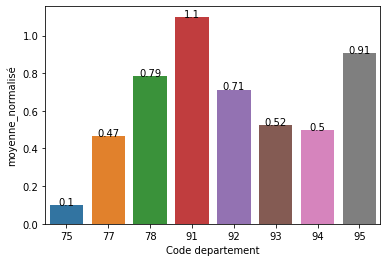

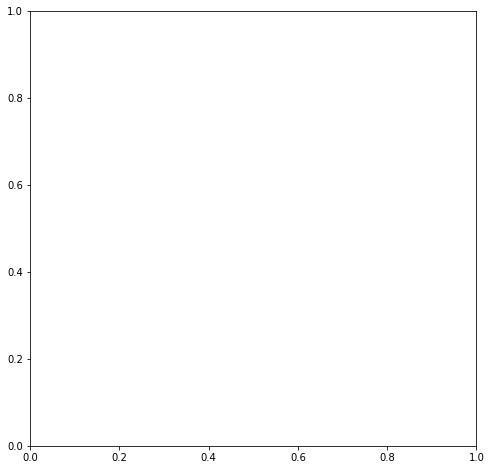

In [ ]:
fig = sns.barplot(x='Code departement',y='moyenne_normalisé',data=df_indic_7, )
fig_dims = (8, 8)
shape= plt.subplots(figsize=fig_dims)
for index, row in df_indic_7.iterrows():
    fig.text(row.name,row.moyenne_normalisé, round(row.moyenne_normalisé,2), color='black', ha="center")

# Indicateur 8 : Différence entre surface moyenne d'une pièce maison appartement

In [ ]:
df_indic_8 = df[['Type local','Nombre pieces principales','Surface reelle bati']]

In [ ]:
df_indic_8 = df_indic_8[(df_indic_8['Type local'] == 'Maison') | (df_indic_8['Type local'] == 'Appartement')]

In [ ]:
df_indic_8 = df_indic_8[(df_indic_8['Surface reelle bati'] != '0') & (df_indic_8['Surface reelle bati'] != 'NULLCOL') &
                        (df_indic_8['Nombre pieces principales'] != '0') & (df_indic_8['Nombre pieces principales'] != 'NULLCOL')]

In [ ]:
df_indic_8['Surface reelle bati'] = df_indic_8['Surface reelle bati'].astype(int)
df_indic_8['Nombre pieces principales'] = df_indic_8['Nombre pieces principales'].astype(int)

In [ ]:
df_indic_8['moyenne_surface_piece'] = round(df_indic_8['Surface reelle bati'] / df_indic_8['Nombre pieces principales'],2)

In [ ]:
df_indic_8 = pd.DataFrame(df_indic_8.groupby('Type local')['moyenne_surface_piece'].mean()).reset_index()

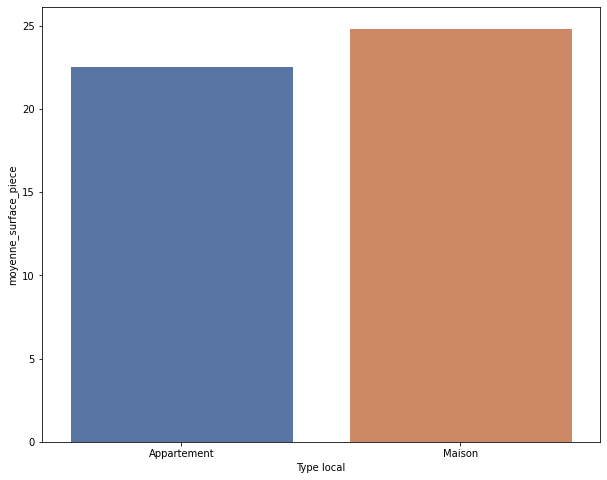

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1.4)
sns.barplot(x='Type local',y='moyenne_surface_piece', data=df_indic_8,errwidth=0)

# Indicateur 9 : Prix du m2 en fonction du type de la voie

In [ ]:
df_indic_9_tmp = df[[ 'Type de voie', 'Valeur fonciere' , 'num_mutation', 'Surface reelle bati']] 

In [ ]:
df_indic_9_tmp = df_indic_9_tmp.loc[df_indic_9_tmp['Surface reelle bati'] != 'NULLCOL']

In [ ]:
df_indic_9_tmp['Surface reelle bati'] = df_indic_9_tmp['Surface reelle bati'].astype(float)

In [ ]:
df_indic_9 = pd.DataFrame(df_indic_9_tmp.groupby('num_mutation')['Surface reelle bati'].sum())

In [ ]:
df_indic_9 = df_indic_9.reset_index()

In [ ]:
df_indic_9 = pd.merge(df_indic_9,df_indic_9_tmp,on='num_mutation',how='left')

In [ ]:
df_indic_9 = df_indic_9.drop_duplicates('num_mutation')\
                        .drop(columns=['Surface reelle bati_y','num_mutation'])

In [ ]:
df_indic_9 = df_indic_9.loc[(df_indic_9['Surface reelle bati_x'] != np.float64(0)) & (df_indic_9['Valeur fonciere'] != np.float64(0))]

In [ ]:
df_indic_9['prix_m2'] = df_indic_9['Valeur fonciere'] / df_indic_9['Surface reelle bati_x']

In [ ]:
fig = pd.DataFrame(df_indic_9.groupby('Type de voie')['prix_m2'].mean().sort_values())

***10 Types les plus chere***

In [ ]:
fig.tail(10).style.background_gradient(cmap='Reds')\
                                .set_properties(**{'text-align':'center'})

***10 Types les moins chere***

In [ ]:
fig.head(10).style.background_gradient(cmap='Blues')\
                                .set_properties(**{'text-align':'center'})

# Indicateur 10 : Répartitions des locaux industiel par régions

In [ ]:
df_indic_10 = df[['Type local' , 'Region']]

In [ ]:
df_indic_10 = df_indic_10[df_indic_10['Type local'] == 'Local industriel. commercial ou assimilé']

In [ ]:
df_indic_10 = pd.DataFrame(df_indic_10.groupby('Region')['Type local'].value_counts())

In [ ]:
df_indic_10.index = [ind[0] for ind in df_indic_10.index]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff16727b1d0>],
      dtype=object)

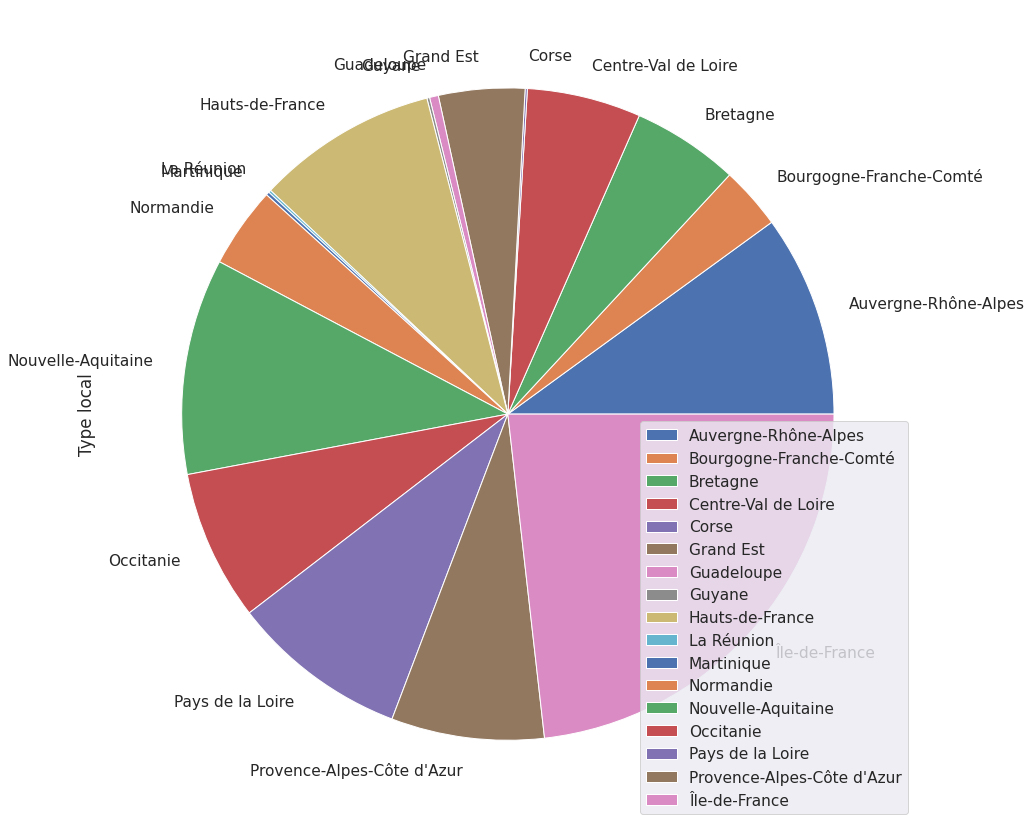

In [ ]:
df_indic_10.plot(kind= 'pie',subplots = True, figsize =(15,15))

# Indicteur sur differentes années

# Chargement et préparation des nouveaux dataframe

!! EXECUTEZ CETTE SECTION AVANT LES INDICATEURS SUIVANTS !!

In [ ]:
df_2018 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/1be77ca5-dc1b-4e50-af2b-0240147e0346',sep='|',dtype='str')

In [ ]:
df_2018['Region'] = df_2018['Code departement'].apply(get_region)

In [ ]:
df_2018['Departement'] = df_2018['Code departement'].apply(get_departement)

In [ ]:
df_2018['annee'] = '2018'

In [ ]:
df_2017 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/7161c9f2-3d91-4caf-afa2-cfe535807f04',sep='|',dtype='str')

In [ ]:
df_2017['Region'] = df_2017['Code departement'].apply(get_region)

In [ ]:
df_2017['Departement'] = df_2017['Code departement'].apply(get_departement)

In [ ]:
df_2017['annee'] = '2017'

# Indicateur comparaison 1 : Nombre de type de local vendu par an

In [ ]:
df_tmp = df.head(1000000).copy().drop(columns=['num_mutation'])

In [ ]:
df_tmp['annee'] = '2019'

In [ ]:
df_indic = df_tmp.append(df_2017.head(1000000)[df_tmp.columns])

In [ ]:
df_indic = df_indic.append(df_2018.head(1000000)[df_tmp.columns])

In [ ]:
df_indic = df_indic.fillna('NULLCOL')

In [ ]:
df_indic = df_indic[df_indic['Type local'] != 'NULLCOL']

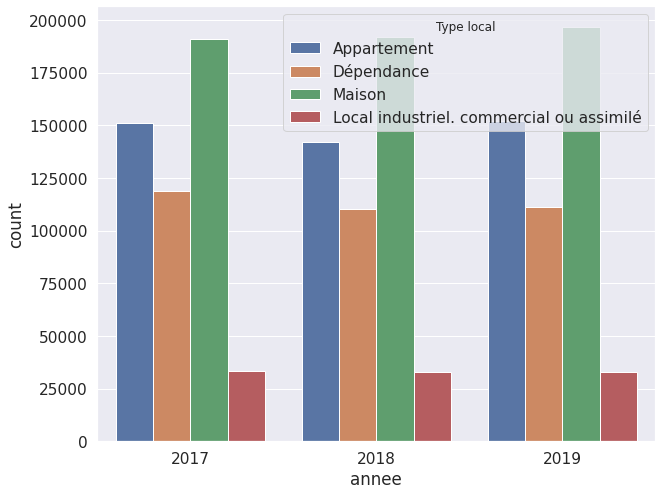

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
test = sns.countplot(x="annee", hue="Type local", data=df_indic)

# Indicateur comparaison 2 : Evolution du nombre de mutation par type

In [ ]:
df_tmp = df.head(1000000).copy().drop(columns=['num_mutation'])

In [ ]:
df_tmp['annee'] = '2019'

In [ ]:
df_indic = df_tmp.append(df_2017.head(1000000)[df_tmp.columns])

In [ ]:
df_indic = df_indic.append(df_2018.head(1000000)[df_tmp.columns])

In [ ]:
df_indic = df_indic.fillna('NULLCOL')

In [ ]:
df_indic = df_indic[df_indic['Nature mutation'] != 'NULLCOL']

In [ ]:
df_indic = pd.DataFrame(df_indic.groupby('annee')['Nature mutation'].value_counts())

In [ ]:
df_indic = df_indic.rename(columns={'Nature mutation' : 'count'})

In [ ]:
df_indic = df_indic.reset_index()

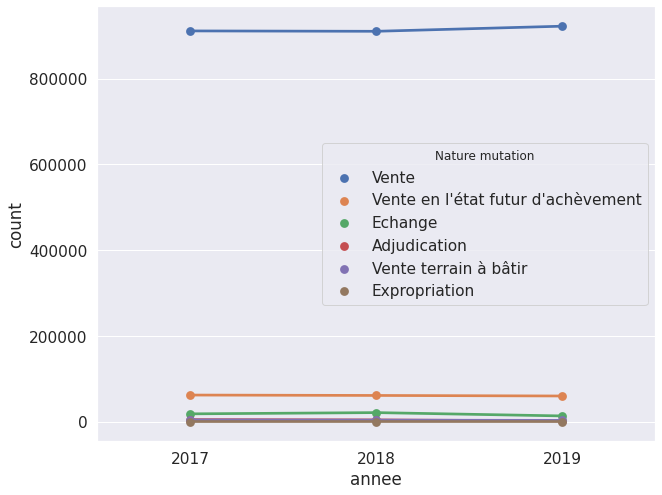

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='annee' , y='count' , hue='Nature mutation',data=df_indic)

# Indicateur 3 : Evolution du nombre de mutations en Ile de France par département

In [ ]:
df_tmp = df.tail(1000000).copy().drop(columns=['num_mutation'])

In [ ]:
df_tmp['annee'] = '2019'

In [ ]:
df_indic = df_tmp.append(df_2017.tail(1000000)[df_tmp.columns])

In [ ]:
df_indic = df_indic.append(df_2018.tail(1000000)[df_tmp.columns])

In [ ]:
df_indic = df_indic.fillna('NULLCOL')

In [ ]:
df_indic = df_indic[(df_indic['Region'] == 'Île-de-France') & (df_indic['Nature mutation'] != 'NULLCOL')]

***Vente***

In [ ]:
df_vente = df_indic[df_indic['Nature mutation'].str.contains('Vente')]

In [ ]:
df_vente = pd.DataFrame(df_vente.groupby('annee')['Departement'].value_counts())

In [ ]:
df_vente = df_vente.rename(columns={'Departement' : 'count'})

In [ ]:
df_vente = df_vente.reset_index()

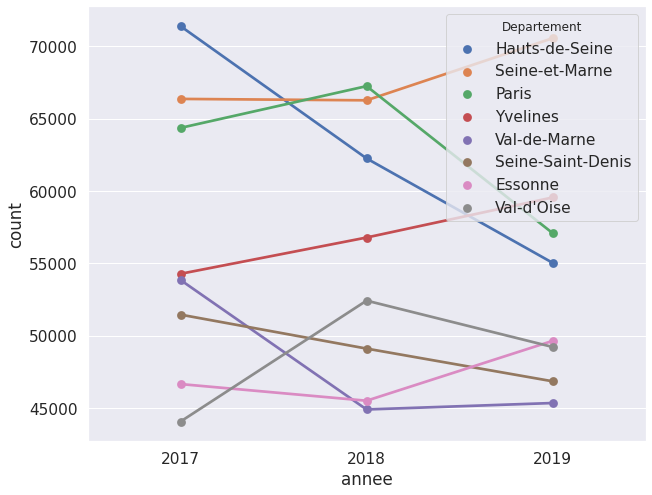

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='annee' , y='count' , hue='Departement',data=df_vente)

***Echange***

In [ ]:
df_adjudication = df_indic[df_indic['Nature mutation'].str.contains('Adjudication')]

In [ ]:
df_adjudication = pd.DataFrame(df_adjudication.groupby('annee')['Departement'].value_counts())

In [ ]:
df_adjudication = df_adjudication.rename(columns={'Departement' : 'count'})

In [ ]:
df_adjudication = df_adjudication.reset_index()

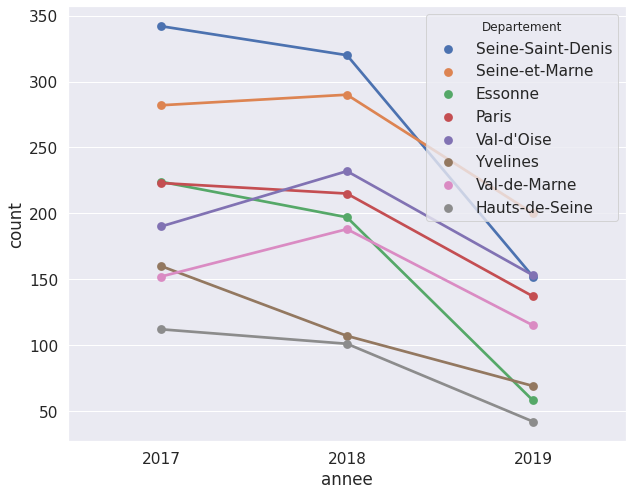

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='annee' , y='count' , hue='Departement',data=df_adjudication)

***Echange***

In [ ]:
df_Echange = df_indic[df_indic['Nature mutation'].str.contains('Echange')]

In [ ]:
df_Echange = pd.DataFrame(df_Echange.groupby('annee')['Departement'].value_counts())

In [ ]:
df_Echange = df_Echange.rename(columns={'Departement' : 'count'})

In [ ]:
df_Echange = df_Echange.reset_index()

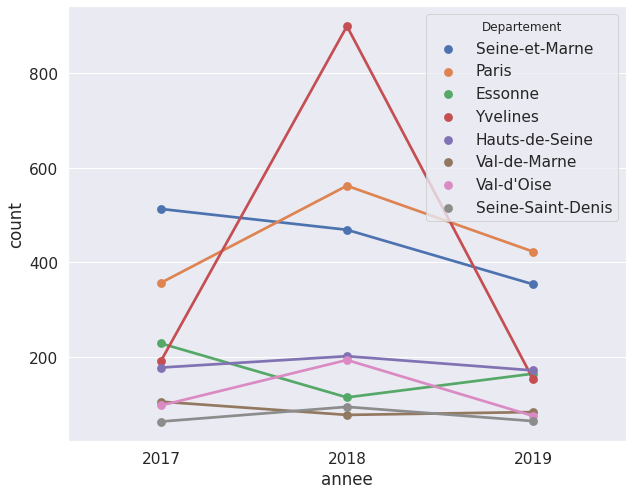

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='annee' , y='count' , hue='Departement',data=df_Echange)

# Indicateur comparaison 4 : Evolution du prix du m2 par région

In [ ]:
def getMeanMetreCarreParRegion(df):
  df['Region'] = df['Code departement'].apply(get_region)
  if 'num_mutation' not in df.columns :
      df['num_mutation'] = df['Date mutation'] + df['Nature mutation']  + df['Valeur fonciere']+ df['Voie'] + df['No voie'] + df['Code postal'] + df['Region']
      df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
      df['Valeur fonciere'] = df['Valeur fonciere'].apply(conv_float)
      df['Valeur fonciere'] = df['Valeur fonciere'].astype(float)
  df_indic_3_tmp = df[['Valeur fonciere' , 'num_mutation', 'Surface reelle bati','Region' ]]
  df_indic_3_tmp = df_indic_3_tmp.loc[df_indic_3_tmp['Surface reelle bati'] != 'NULLCOL']
  df_indic_3_tmp['Surface reelle bati'] = df_indic_3_tmp['Surface reelle bati'].astype(float)
  df_indic_3 = pd.DataFrame(df_indic_3_tmp.groupby('num_mutation')['Surface reelle bati'].sum())
  df_indic_3 = df_indic_3.reset_index()
  df_indic_3 = pd.merge(df_indic_3,df_indic_3_tmp,on='num_mutation',how='left')
  df_indic_3 = df_indic_3.drop_duplicates('num_mutation')\
                        .drop(columns=['Surface reelle bati_y','num_mutation'])
                        
  df_indic_3 = df_indic_3.loc[(df_indic_3['Surface reelle bati_x'] != np.float64(0)) & (df_indic_3['Valeur fonciere'] != np.float64(0))]
  df_indic_3['prix_m2'] = df_indic_3['Valeur fonciere'] / df_indic_3['Surface reelle bati_x']
  res = pd.DataFrame(df_indic_3.groupby('Region')['prix_m2'].mean())
  res = res.reset_index()
  return res

In [ ]:
res2017 = getMeanMetreCarreParRegion(df_2017.copy().head(2000000)).head(3)
res2017['annee'] = '2017'

In [ ]:
G

In [ ]:
res2019 = getMeanMetreCarreParRegion(df.copy().head(2000000)).head(3)
res2019['annee'] = '2019'

In [ ]:
df_indic = res2019.append(res2018[res2019.columns])

In [ ]:
df_indic = df_indic.append(res2017[res2019.columns])

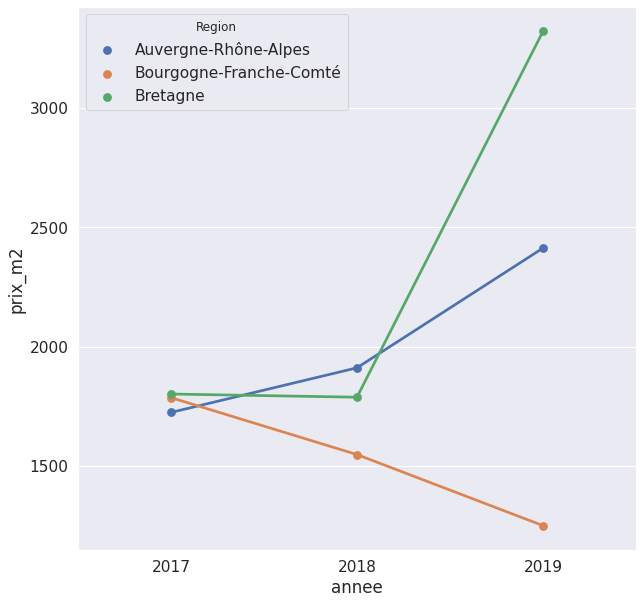

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
test = sns.pointplot(x="annee", y="prix_m2",hue='Region', data=df_indic)